In [1]:
from gc import enable

import numpy as np


In [2]:

data = np.load('../data_recording/DATA_8mhz.npy', 'r', allow_pickle=True, )[0]

In [3]:
data_seconds = np.array_split(data, 5)  # split array into 1 second chunks (20,000,000 samples at 4MHz is 5 seconds)

In [4]:
print(max(np.abs(data_seconds[0])))
print(max(np.abs(data_seconds[1])))
print(max(np.abs(data_seconds[2])))
print(max(np.abs(data_seconds[3])))
print(max(np.abs(data_seconds[4])))

0.02430279
0.023803042
0.014722228
0.028667986
0.024618898


In [5]:
print(min(np.abs(data_seconds[0])))
print(min(np.abs(data_seconds[1])))
print(min(np.abs(data_seconds[2])))
print(min(np.abs(data_seconds[3])))
print(min(np.abs(data_seconds[4])))

0.0
0.0
0.0
0.0
0.0


In [6]:
data_seconds[0][0]

np.abs(data_seconds[0])

array([7.6540012e-04, 1.2452895e-03, 1.1353538e-03, ..., 6.1037004e-05,
       1.0685835e-03, 1.7912565e-03], shape=(4000000,), dtype=float32)

In [7]:
len(data_seconds[0])

4000000

In [8]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Range1d, Widget

from bokeh.colors.named import blueviolet

output_notebook()

Loading BokehJS ...

In [9]:
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = np.array([(r, g, 150) for r, g in zip(50 + 2 * x, 30 + 2 * y)], dtype="uint8")

TOOLS = "hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,examine,help"

p = figure(tools=TOOLS)

d2 = np.extract(np.abs(data_seconds[0]) > 3e-3, data_seconds[0])
graph_data = d2
radius = 5e-6

x = np.real(graph_data)
y = np.imag(graph_data)

p.y_range = Range1d(-0.01, 0.01)
p.x_range = Range1d(-0.01, 0.01)

p.circle(x, y, radius=radius,
         fill_color=blueviolet, fill_alpha=0.1,
         line_color=None)
show(p)

In [10]:
avg_pwr = np.mean(np.abs(data_seconds[0]) ** 2)
print("avg_pwr:", avg_pwr)
avg_pwr_var = np.var(x)
print("avg_pwr_var:", avg_pwr_var)

avg_pwr: 5.0156978e-06
avg_pwr_var: 1.5765563e-05


In [11]:
import matplotlib.pyplot as plt

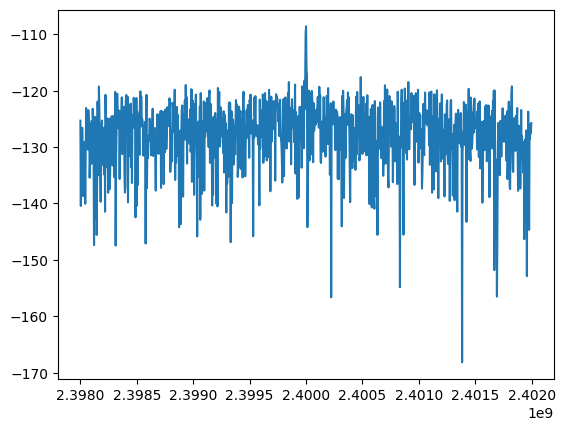

In [12]:
x = data_seconds[0]
d2 = np.extract(np.abs(x) > 3e-3, x)
Fs = 4e6  # lets say we sampled at 4 MHz
# assume x contains your array of IQ samples
N = 1024
x = x[0:N]  # we will only take the FFT of the first 1024 samples, see text below
PSD = np.abs(np.fft.fft(x)) ** 2 / (N * Fs)
PSD_log = 10.0 * np.log10(PSD)
PSD_shifted = np.fft.fftshift(PSD_log)

# add the following line after doing x = x[0:1024]
x = x * np.hamming(len(x))  # apply a Hamming window

center_freq = 2.4e9  # frequency we tuned our SDR to
f = np.arange(Fs / -2.0, Fs / 2.0, Fs / N)  # start, stop, step.  centered around 0 Hz
f += center_freq  # now add center frequency
plt.plot(f, PSD_shifted)
plt.show()

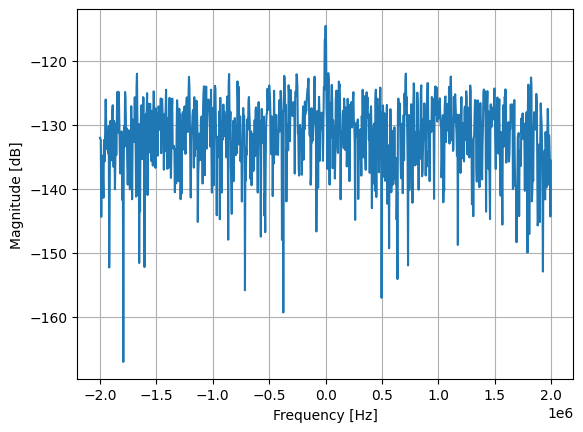

In [13]:
Fs = 4e6  # sample rate
Ts = 1 / Fs  # sample period
N = 1024  # number of samples to simulate
x = data[:N]
# x = np.extract(np.abs(x) > 3e-3, x)
x = x * np.hamming(len(x))  # apply a Hamming window

PSD = np.abs(np.fft.fft(x)) ** 2 / (N * Fs)
PSD_log = 10.0 * np.log10(PSD)
PSD_shifted = np.fft.fftshift(PSD_log)

f = np.arange(Fs / -2.0, Fs / 2.0, Fs / N)  # start, stop, step

plt.plot(f, PSD_shifted)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()

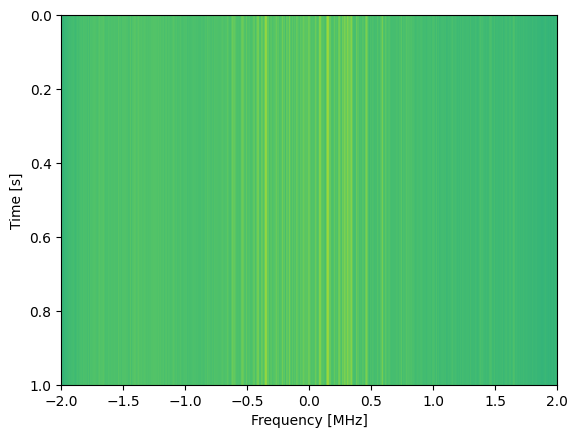

In [14]:
Fs = 4e6
sample_rate = 4e6  # sample rate
Ts = 1 / Fs  # sample period
N = 4_000_000  # number of samples to simulate
x = data[:N]

fft_size = N
num_rows = len(x) // fft_size  # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))

for i in range(num_rows):
    spectrogram[i, :] = 10 * np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i * fft_size:(i + 1) * fft_size]))) ** 2)

plt.imshow(spectrogram, aspect='auto', extent=[sample_rate / -2 / 1e6, sample_rate / 2 / 1e6, len(x) / sample_rate, 0])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()

In [15]:
from ipywidgets import interact, FloatSlider, interactive, IntSlider

# ss = interactive(f, sub_sample=(2,40, 2))
# display(ss)

In [48]:
def plot_basic(graph_data, x_center=0, y_center=0, radius_setting=5, opacity=50, color='blueviolet'):
    radius = 10 ** (((3 / 10) * (radius_setting - 1)))  # range between -1 and 2 where radius setting is 1-10

    x = np.real(graph_data)
    y = np.imag(graph_data)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))

    # Set the axis limits
    ax.set_xlim(-0.01, 0.01)
    ax.set_ylim(-0.01, 0.01)

    # Plot the scatter plot with circles
    ax.scatter(x, y, s=radius, color=color, alpha=opacity / 100, edgecolors='none')

    # Set aspect ratio to be equal
    ax.set_aspect('equal')

    # Add grid and labels
    ax.grid(True)
    ax.set_title("Interactive Scatter Plot")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # Show the plot
    plt.show()


In [49]:


import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Play
import ipywidgets as widgets

data_ms = np.array_split(data_seconds[0], 1000)

max_t = 50  # max number of ms samples


# Define the function to plot the circle
def plot_circle(x_center=0, y_center=0, sub_sample=40, radius_setting=0, millis_start=0, millis_len=0, opacity=50):
    # radius = 0.1
    # sub_sample = ss.kwargs["sub_sample"]

    radius = 10 ** (((3 / 10) * (radius_setting - 1)))  # range between -1 and 2 where radius setting is 1-10
    print("radius:", radius)

    # d2 = np.extract(np.abs(data_seconds[0]) > 3e-3, data_seconds[0])
    graph_data = np.ravel(data_ms[millis_start:(millis_start + millis_len)])[::sub_sample]
    # radius = 0.1#5e-6
    plot_basic(graph_data, x_center, y_center, radius_setting, opacity)


start_value = 17

play = Play(
    min=0, max=max_t, step=1, value=start_value,
    interval=3000,
    repeat=False,
    disabled=False,
)  #
millis_start = widgets.IntSlider(min=0, max=max_t, step=1, value=start_value, description='T1 [ms]:',
                                 layout=widgets.Layout(width='60%'))
widgets.jslink((play, 'value'), (millis_start, 'value'))

# plot_circle(0,0,40, 0.5)
# Add sliders for x_center, y_center, and radius
graph = interactive(
    plot_circle,
    x_center=FloatSlider(min=-0.01, max=0.01, step=0.001, value=0, description='X Center:',
                         layout=widgets.Layout(width='60%')),
    y_center=FloatSlider(min=-0.01, max=0.01, step=0.001, value=0, description='Y Center:',
                         layout=widgets.Layout(width='60%')),
    sub_sample=IntSlider(min=1, max=40, step=2, value=1, description='subsample:', layout=widgets.Layout(width='60%')),
    radius_setting=FloatSlider(min=1, max=10, step=1, value=5, description='Radius:',
                               layout=widgets.Layout(width='60%')),
    opacity=FloatSlider(min=1, max=100, step=1, value=50, description='Opacity:', layout=widgets.Layout(width='60%')),
    millis_start=millis_start,
    millis_len=widgets.IntSlider(min=0, max=max_t, step=1, value=2, description='Tlen [ms]:',
                                 layout=widgets.Layout(width='60%')),
)
display(widgets.VBox([widgets.HBox([play, millis_start]), graph]))


#


In [80]:

ms_2 = np.ravel(data_ms[18:20])
us_slices = 2000
us = np.array_split(ms_2, us_slices)
print(len(us[0]))


def plot_us(x_center=0, y_center=0, radius_setting=5, opacity=50, t_start=0, t_len=20):
    plot_basic(np.ravel(us[t_start:t_start + t_len]), x_center, y_center, radius_setting, opacity)


start_value = 757
step_value = 1024
max_t = us_slices

play = Play(
    min=0, max=max_t, step=step_value, value=start_value,
    interval=500,
    repeat=False,
    disabled=False,
)  #
t_start = widgets.IntSlider(min=0, max=max_t, step=1, value=start_value, description='Ts [us]:',
                            layout=widgets.Layout(width='100%'))
widgets.jslink((play, 'value'), (t_start, 'value'))

graph = widgets.interactive(
    plot_us,
    radius_setting=FloatSlider(
        min=1, max=10, step=1, value=5, description='Radius:',
        layout=widgets.Layout(width='60%')
    ),
    opacity=FloatSlider(min=1, max=100, step=1, value=50, description='Opacity:', layout=widgets.Layout(width='60%')),
    t_start=t_start,
    t_len=widgets.IntSlider(min=0, max=max_t, step=1, value=step_value, description='Tlen [us]:',
                            layout=widgets.Layout(width='100%')),
)

display(widgets.VBox([widgets.HBox([play]), graph]))

4


In [72]:
packet_signal = np.ravel(us[757:757 + 736])

step_size = 10

def plot_over_time(i=0):
    start = i*step_size
    end = (i+1)*step_size
    plot_basic(packet_signal[start:end],opacity=100, color='#000')

max_step = int(len(packet_signal)/step_size)
play = Play(
    min=0, max=max_step, step=step_size, value=0,
    interval=500,
    repeat=True,
    disabled=False,
)  #
t_start = widgets.IntSlider(min=0, max=max_step, step=step_size, value=0, description='Step:',
                            layout=widgets.Layout(width='60%'))
widgets.jslink((play, 'value'), (t_start, 'value'))

graph = widgets.interactive(plot_over_time, i=t_start)
display(widgets.VBox([play, graph]))


In [ ]:
plot_basic(packet_signal,opacity=100, color='#000')
len(packet_signal)

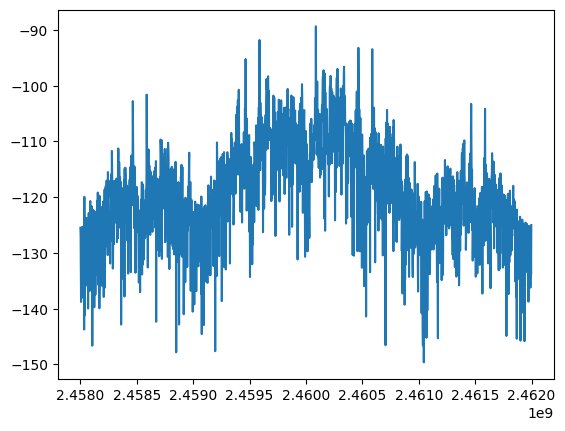

In [59]:
x = packet_signal
d2 = np.extract(np.abs(x) > 3e-3, x)
Fs = 4e6  # lets say we sampled at 4 MHz
# assume x contains your array of IQ samples
N = 2048
x = x[0:N]  # we will only take the FFT of the first 1024 samples, see text below
PSD = np.abs(np.fft.fft(x)) ** 2 / (N * Fs)
PSD_log = 10.0 * np.log10(PSD)
PSD_shifted = np.fft.fftshift(PSD_log)

# add the following line after doing x = x[0:1024]
x = x * np.hamming(len(x))  # apply a Hamming window

center_freq = 2.46e9  # frequency we tuned our SDR to
f = np.arange(Fs / -2.0, Fs / 2.0, Fs / N)  # start, stop, step.  centered around 0 Hz
f += center_freq  # now add center frequency
plt.plot(f, PSD_shifted)
plt.show()

In [63]:

from scipy.signal import firwin
# Low-Pass Filter
taps = firwin(numtaps=101, cutoff=7.5e3, fs=sample_rate)
packet_signal = np.convolve(x, taps, 'valid')